{'results': [{'alternatives': [{'confidence': 0.24, 'transcript': 'it '}], 'final': True}, {'alternatives': [{'confidence': 0.15, 'transcript': 'he '}], 'final': True}, {'alternatives': [{'confidence': 0.46, 'transcript': 'sun and moon is '}], 'final': True}, {'alternatives': [{'confidence': 0.52, 'transcript': 'you must '}], 'final': True}, {'alternatives': [{'confidence': 0.06, 'transcript': 'you '}], 'final': True}, {'alternatives': [{'confidence': 0.21, 'transcript': 'you '}], 'final': True}, {'alternatives': [{'confidence': 0.88, 'transcript': '%HESITATION '}], 'final': True}], 'result_index': 0}
7


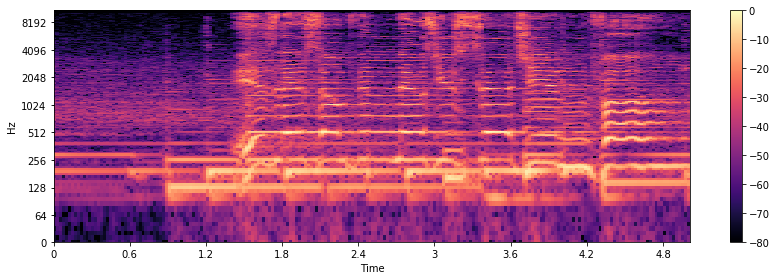

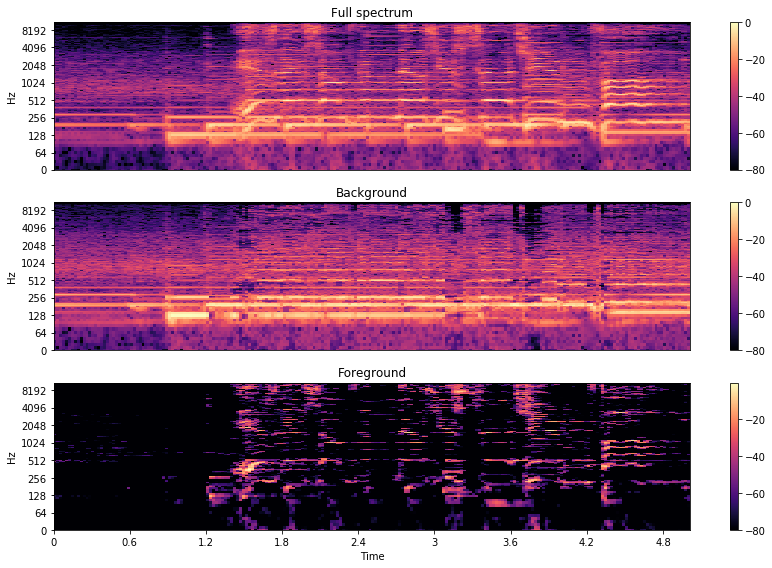

In [38]:
import wave
import os
from os.path import join,dirname
from watson_developer_cloud import SpeechToTextV1
import pyaudio
import numpy as np
import speech_recognition as s
import matplotlib.pyplot as plt
import librosa

import librosa.display


y, sr = librosa.load('C:/Users/camil/Desktop/Projetmonsprojetbase/musiquetest.wav', duration=180)


# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))
idx = slice(*librosa.time_to_frames([30, 35], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

S_filter = librosa.decompose.nn_filter(S_full,aggregate=np.median,metric='cosine',width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)

margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,margin_i * (S_full - S_filter),power=power)

mask_v = librosa.util.softmask(S_full - S_filter,margin_v * S_filter,power=power)

S_foreground = mask_v * S_full
S_background = mask_i * S_full

D_foreground = S_foreground * phase

y_foreground = librosa.istft(D_foreground)
librosa.output.write_wav("musiquetestresultat3.wav", y_foreground, sr)

IBM_API = "-3kCDJhK9MLpl6G_0jZOXo7WsDwkQW8ALqTkTm6WB5Wu"
IBM_URL = 'https://gateway-lon.watsonplatform.net/speech-to-text/api'
service = SpeechToTextV1(url=IBM_URL,iam_apikey=IBM_API)
i=0
with open(join(dirname('musiquetestresultat3.wav'), 'musiquetestresultat3.wav'), 'rb') as audio_file:
    text=service.recognize(audio_file, content_type='audio/wav').get_result()
    print(text)
    conf=text['results']
    j=len(conf)
    print(j)
    conf3=conf[0]
    conf4=conf3['alternatives']
    #print(conf4)
    
    
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()